# Project 1: Regression

This project asks you to perform various experiments with regression. The dataset we are using is taken from a real estate dataset:

https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

The objective of this project is to become familiar with the underlying techniques of machine learning, and implement some of the techniques yourself. 

You will write code and discussion texts into code and text cells in this notebook. 

If a block starts with TODO:, this means that you need to write something there. 

Some code had been written for you to guide the project. Don't change the already written code.

## Grading
The points add up to 42, that is 30 + 12 bonus points. While there is no difference between the regular and the bonus points, I recommend that you solve the problems labeled "BONUS" after you finished the other ones. 


In [225]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import time

## Setup for the first part of the project

For problems P1 to P6 we are using a simple dataset where we extract one 
explanatory variable ``sq_mt_built`` to predict the price of the house ``buy_price``

The length 21742
The columns of the database Index(['sq_mt_built', 'buy_price'], dtype='object')


<AxesSubplot:xlabel='sq_mt_built', ylabel='buy_price'>

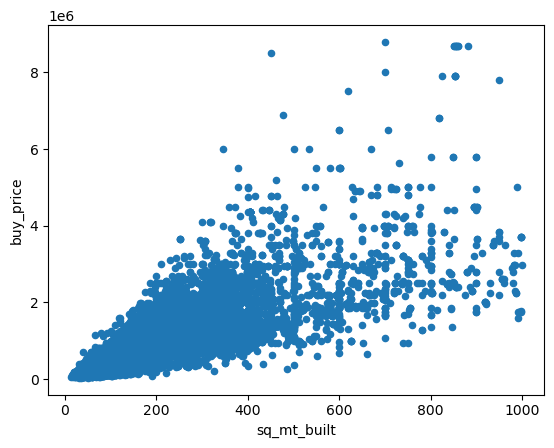

In [208]:
from sklearn.model_selection import train_test_split


df = pd.read_csv("houses_Madrid.csv")

df_buy = df.drop(columns = ['n_floors', 'sq_mt_allotment', 'latitude', 'longitude', 'raw_address', 'street_number', 'portal', 'door', 'operation',
                        'rent_price_by_area', 'is_rent_price_known', 'is_buy_price_known', 'are_pets_allowed', 'has_ac', 'has_fitted_wardrobes',
                        'has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room', 'is_furnished', 'is_kitchen_equipped',
                        'is_accessible', 'has_green_zones', 'has_parking', 'has_private_parking', 'has_public_parking', 'is_parking_included_in_price',
                        'parking_price','id', 'title', 'is_exact_address_hidden', 'rent_price', 'is_orientation_north', 'is_orientation_south', 
                        'is_orientation_east', 'is_orientation_west', 'built_year', 'is_floor_under', 'is_new_development', 'has_lift', 'is_exterior',
                        'energy_certificate', 'subtitle', 'Unnamed: 0', 'street_name', 'has_individual_heating', 'has_central_heating','neighborhood_id',
                        'is_renewal_needed', 'house_type_id','buy_price_by_area','floor','n_bathrooms','n_rooms','sq_mt_useful'])


print(f"The length {len(df_buy.index)}")
print(f"The columns of the database {df_buy.columns}")

df_shuffled = df_buy.sample(frac=1) # shuffle the rows
df_shuffled = df_shuffled.dropna()

training_data_x, test_data_x, training_data_y, test_data_y = train_test_split(df_shuffled["sq_mt_built"], df_shuffled["buy_price"], test_size = .3)



df_buy[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")



## P1: Loss function (3 pts)
Implement a root-mean-square error (RMSE) loss function between the prediction $\hat{y}$ and $y$ value using Python operations. Run some experiments to validate that this works as expected. 
Then, look up the same in the sklearn library
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
and implement it based on what is there. 

In [216]:
# TODO: implement the loss function here using Python math ops and sklearn

from sklearn.metrics import mean_squared_error


def loss_RMSE(y, yhat):
    
    total = 0

    for z in range(len(y)):
        total += (((y[z]-yhat[z])**2)/len(y))
    
    RMSE = total**(1/2)
    return RMSE

def loss_RMSE_sk(y, yhat):
    RMSE_sk = (mean_squared_error(y, yhat, squared = False))
    return RMSE_sk

In [217]:
# TODO: Now, run some experiments with your function, with the one taken with sklearn 
# Compare their outputs.

print(loss_RMSE([1,2,5,2,6,9,6,4,78,0,6,4,56,7,5,42,5457,43,5], [1,2,5,2,6,1,6,4,78,0,6,4,6,7,5,42,557,4,5]))
print(loss_RMSE_sk([1,2,5,2,6,9,6,4,78,0,6,4,56,7,5,42,5457,43,5], [1,2,5,2,6,1,6,4,78,0,6,4,6,7,5,42,557,4,5]))

1124.2327208039783
1124.2327208039783


## P2: Implement a linear predictor (3 pts)
Implement a function of type ``predict(x, theta) --> y_hat`` which implements a linear model of the type $\hat{y} = \theta_1 \cdot x + \theta_0$

In [219]:
# TODO: implement the predictor function here


def predict(x, theta):
    y_hat = theta[0] + theta[1] *x
    return y_hat

In [221]:
# TODO: now, run some experiments with it

print(predict(test_data_x,[4000,0]))
y_pred = predict(test_data_x,[4000,0])
print(loss_RMSE_sk(test_data_y, y_pred))

9711     4000.0
4250     4000.0
14778    4000.0
16074    4000.0
675      4000.0
          ...  
2947     4000.0
15357    4000.0
5868     4000.0
3734     4000.0
6582     4000.0
Name: sq_mt_built, Length: 6485, dtype: float64
965233.1426261417


## P3: Implement a "grid search" function (3 pts)
Implement a function grid_search() which returns an estimate of the best $\theta$ by trying out all the combinations of possibilities on a grid and returning the values that give you the most values. 
gridx and gridy define the range of numbers that we want to explore. For instance, grid0 might be [0, 0.25, 0.5, 0.75, 1.0] 

In [222]:
# TODO: implement the grid search function here 

def grid_search(data_x, data_y, grid0, grid1):

    lowest = 999999999999999

    for b in grid0:
            for m in grid1:
                    yhat = predict(data_x,[b,m])
                    loss = loss_RMSE_sk(data_y, yhat)
                    if(abs(loss) < abs(lowest)):
                        lowest = loss
                        theta = [b,m]
    return theta

In [226]:
# TODO: run some experiments with grid_search
# Define some grid values. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

start_time = time.time()

grid0 = [556641]
grid1 = [162804]

theta = [0, 0]

theta = grid_search(training_data_x, training_data_y, grid0, grid1)

prev_loss = loss_RMSE_sk(test_data_y, predict(test_data_x, theta))
loss = prev_loss-1

timer = 1

while loss != prev_loss:
    grid0 = [theta[0] * .5, theta[0]*.75, theta[0] * .9,theta[0] * .95,theta[0] * .96, theta[0]*.97,theta[0]*.98, theta[0] * .99, theta[0] * .999, theta[0] * .9995, theta[0], theta[0] * 1.01, theta[0] * 1.001, theta[0] * 1.0001, theta[0] * 1.00005, theta[0] * 1.1, theta[0]*1.25, theta[0] * 1.5, theta[0]*1.75, theta[0] * 2]
    grid1 = [theta[1] * .5, theta[1]*.75, theta[1] * .9,theta[1] * .95,theta[1] * .96, theta[1]*.97,theta[1]*.98, theta[1] * .99, theta[1] * .999, theta[1] * .9995, theta[1], theta[1] * 1.01, theta[1] * 1.001, theta[1] * 1.0001, theta[1] * 1.00005, theta[1] * 1.1, theta[1]*1.25, theta[1] * 1.5, theta[1]*1.75, theta[1] * 2]
    theta = grid_search(training_data_x, training_data_y, grid0, grid1)
    prev_loss = loss
    loss = loss_RMSE_sk(test_data_y, predict(test_data_x, theta))

loss = prev_loss - 1

while loss != prev_loss:
    grid0 = [theta[0]*.9999, theta[0] * .99999,theta[0] * .999999,theta[0] * .9999999, theta[0]*.99999999,theta[0]*.999999999, theta[0], theta[0] * 1.000000001, theta[0]*1.00000001, theta[0] * 1.0000001, theta[0]*1.000001, theta[0] * 1.00001]
    grid1 = [theta[1]*.9999, theta[1] * .99999,theta[1] * .999999,theta[1] * .9999999, theta[1]*.99999999,theta[1]*.999999999, theta[1], theta[1] * 1.000000001, theta[1]*1.00000001, theta[1] * 1.0000001, theta[1]*1.000001, theta[1] * 1.00001]
    theta = grid_search(training_data_x, training_data_y, grid0, grid1)
    prev_loss = loss
    loss = loss_RMSE_sk(test_data_y, predict(test_data_x, theta))
    


print(theta[0], theta[1])

print("loss of",loss_RMSE_sk(test_data_y, predict(test_data_x, theta)))

print("took", time.time()- start_time, "to run")

    


4.939023496156958e-10 4453.9782161229805
402799.2333933424
took  6.995639324188232  to run


In [228]:
# TODO: repeat the experimentation from above with different grids. 
# Finally, print the grid that provides the best value while still running faster 
# than 10 seconds.

start_time = time.time()

grid0 = [theta[0]*(1.000000), theta[0]*(0.999598), theta[0]*(0.999196), theta[0]*(0.998795), theta[0]*(0.998393), theta[0]*(0.997991), theta[0]*(0.997589), theta[0]*(0.997187), theta[0]*(0.996786), theta[0]*(0.996384), theta[0]*(0.995982), theta[0]*(0.995580), theta[0]*(0.995179), theta[0]*(0.994777), theta[0]*(0.994375), theta[0]*(0.993973), theta[0]*(0.993571), theta[0]*(0.993170), theta[0]*(0.992768), theta[0]*(0.992366), theta[0]*(0.991964), theta[0]*(0.991562), theta[0]*(0.991161), theta[0]*(0.990759), theta[0]*(0.990357), theta[0]*(0.989955), theta[0]*(0.989553), theta[0]*(0.989152), theta[0]*(0.988750), theta[0]*(0.988348), theta[0]*(0.987946), theta[0]*(0.987545), theta[0]*(0.987143), theta[0]*(0.986741), theta[0]*(0.986339), theta[0]*(0.985937), theta[0]*(0.985536), theta[0]*(0.985134), theta[0]*(0.984732), theta[0]*(0.984330), theta[0]*(0.983928), theta[0]*(0.983527), theta[0]*(0.983125), theta[0]*(0.982723), theta[0]*(0.982321), theta[0]*(0.981919), theta[0]*(0.981518), theta[0]*(0.981116), theta[0]*(0.980714), theta[0]*(0.980312), theta[0]*(0.979911), theta[0]*(0.979509), theta[0]*(0.979107), theta[0]*(0.978705), theta[0]*(0.978303), theta[0]*(0.977902), theta[0]*(0.977500), theta[0]*(0.977098), theta[0]*(0.976696), theta[0]*(0.976294), theta[0]*(0.975893), theta[0]*(0.975491), theta[0]*(0.975089), theta[0]*(0.974687), theta[0]*(0.974285), theta[0]*(0.973884), theta[0]*(0.973482), theta[0]*(0.973080), theta[0]*(0.972678), theta[0]*(0.972276), theta[0]*(0.971875), theta[0]*(0.971473), theta[0]*(0.971071), theta[0]*(0.970669), theta[0]*(0.970268), theta[0]*(0.969866), theta[0]*(0.969464), theta[0]*(0.969062), theta[0]*(0.968660), theta[0]*(0.968259), theta[0]*(0.967857), theta[0]*(0.967455), theta[0]*(0.967053), theta[0]*(0.966651), theta[0]*(0.966250), theta[0]*(0.965848), theta[0]*(0.965446), theta[0]*(0.965044), theta[0]*(0.964642), theta[0]*(0.964241), theta[0]*(0.963839), theta[0]*(0.963437), theta[0]*(0.963035), theta[0]*(0.962634), theta[0]*(0.962232), theta[0]*(0.961830), theta[0]*(0.961428), theta[0]*(0.961026), theta[0]*(0.960625), theta[0]*(0.960223), theta[0]*(0.959821), theta[0]*(0.959419), theta[0]*(0.959017), theta[0]*(0.958616), theta[0]*(0.958214), theta[0]*(0.957812), theta[0]*(0.957410), theta[0]*(0.957008), theta[0]*(0.956607), theta[0]*(0.956205), theta[0]*(0.955803), theta[0]*(0.955401), theta[0]*(0.955000), theta[0]*(0.954598), theta[0]*(0.954196), theta[0]*(0.953794), theta[0]*(0.953392), theta[0]*(0.952991), theta[0]*(0.952589), theta[0]*(0.952187), theta[0]*(1.000402), theta[0]*(1.000804), theta[0]*(1.001205), theta[0]*(1.001607), theta[0]*(1.002009), theta[0]*(1.002411), theta[0]*(1.002813), theta[0]*(1.003214), theta[0]*(1.003616), theta[0]*(1.004018), theta[0]*(1.004420), theta[0]*(1.004821), theta[0]*(1.005223), theta[0]*(1.005625), theta[0]*(1.006027), theta[0]*(1.006429), theta[0]*(1.006830), theta[0]*(1.007232), theta[0]*(1.007634), theta[0]*(1.008036), theta[0]*(1.008438), theta[0]*(1.008839), theta[0]*(1.009241), theta[0]*(1.009643), theta[0]*(1.010045), theta[0]*(1.010447), theta[0]*(1.010848), theta[0]*(1.011250), theta[0]*(1.011652), theta[0]*(1.012054), theta[0]*(1.012455), theta[0]*(1.012857), theta[0]*(1.013259), theta[0]*(1.013661), theta[0]*(1.014063), theta[0]*(1.014464), theta[0]*(1.014866), theta[0]*(1.015268), theta[0]*(1.015670), theta[0]*(1.016072), theta[0]*(1.016473), theta[0]*(1.016875), theta[0]*(1.017277), theta[0]*(1.017679)]
grid1 = [theta[1]*(1.000000), theta[1]*(0.999598), theta[1]*(0.999196), theta[1]*(0.998795), theta[1]*(0.998393), theta[1]*(0.997991), theta[1]*(0.997589), theta[1]*(0.997187), theta[1]*(0.996786), theta[1]*(0.996384), theta[1]*(0.995982), theta[1]*(0.995580), theta[1]*(0.995179), theta[1]*(0.994777), theta[1]*(0.994375), theta[1]*(0.993973), theta[1]*(0.993571), theta[1]*(0.993170), theta[1]*(0.992768), theta[1]*(0.992366), theta[1]*(0.991964), theta[1]*(0.991562), theta[1]*(0.991161), theta[1]*(0.990759), theta[1]*(0.990357), theta[1]*(0.989955), theta[1]*(0.989553), theta[1]*(0.989152), theta[1]*(0.988750), theta[1]*(0.988348), theta[1]*(0.987946), theta[1]*(0.987545), theta[1]*(0.987143), theta[1]*(0.986741), theta[1]*(0.986339), theta[1]*(0.985937), theta[1]*(0.985536), theta[1]*(0.985134), theta[1]*(0.984732), theta[1]*(0.984330), theta[1]*(0.983928), theta[1]*(0.983527), theta[1]*(0.983125), theta[1]*(0.982723), theta[1]*(0.982321), theta[1]*(0.981919), theta[1]*(0.981518), theta[1]*(0.981116), theta[1]*(0.980714), theta[1]*(0.980312), theta[1]*(0.979911), theta[1]*(0.979509), theta[1]*(0.979107), theta[1]*(0.978705), theta[1]*(0.978303), theta[1]*(0.977902), theta[1]*(0.977500), theta[1]*(0.977098), theta[1]*(0.976696), theta[1]*(0.976294), theta[1]*(0.975893), theta[1]*(0.975491), theta[1]*(0.975089), theta[1]*(0.974687), theta[1]*(0.974285), theta[1]*(0.973884), theta[1]*(0.973482), theta[1]*(0.973080), theta[1]*(0.972678), theta[1]*(0.972276), theta[1]*(0.971875), theta[1]*(0.971473), theta[1]*(0.971071), theta[1]*(0.970669), theta[1]*(0.970268), theta[1]*(0.969866), theta[1]*(0.969464), theta[1]*(0.969062), theta[1]*(0.968660), theta[1]*(0.968259), theta[1]*(0.967857), theta[1]*(0.967455), theta[1]*(0.967053), theta[1]*(0.966651), theta[1]*(0.966250), theta[1]*(0.965848), theta[1]*(0.965446), theta[1]*(0.965044), theta[1]*(0.964642), theta[1]*(0.964241), theta[1]*(0.963839), theta[1]*(0.963437), theta[1]*(0.963035), theta[1]*(0.962634), theta[1]*(0.962232), theta[1]*(0.961830), theta[1]*(0.961428), theta[1]*(0.961026), theta[1]*(0.960625), theta[1]*(0.960223), theta[1]*(0.959821), theta[1]*(0.959419), theta[1]*(0.959017), theta[1]*(0.958616), theta[1]*(0.958214), theta[1]*(0.957812), theta[1]*(0.957410), theta[1]*(0.957008), theta[1]*(0.956607), theta[1]*(0.956205), theta[1]*(0.955803), theta[1]*(0.955401), theta[1]*(0.955000), theta[1]*(0.954598), theta[1]*(0.954196), theta[1]*(0.953794), theta[1]*(0.953392), theta[1]*(0.952991), theta[1]*(0.952589), theta[1]*(0.952187), theta[1]*(1.000402), theta[1]*(1.000804), theta[1]*(1.001205), theta[1]*(1.001607), theta[1]*(1.002009), theta[1]*(1.002411), theta[1]*(1.002813), theta[1]*(1.003214), theta[1]*(1.003616), theta[1]*(1.004018), theta[1]*(1.004420), theta[1]*(1.004821), theta[1]*(1.005223), theta[1]*(1.005625), theta[1]*(1.006027), theta[1]*(1.006429), theta[1]*(1.006830), theta[1]*(1.007232), theta[1]*(1.007634), theta[1]*(1.008036), theta[1]*(1.008438), theta[1]*(1.008839), theta[1]*(1.009241), theta[1]*(1.009643), theta[1]*(1.010045), theta[1]*(1.010447), theta[1]*(1.010848), theta[1]*(1.011250), theta[1]*(1.011652), theta[1]*(1.012054), theta[1]*(1.012455), theta[1]*(1.012857), theta[1]*(1.013259), theta[1]*(1.013661), theta[1]*(1.014063), theta[1]*(1.014464), theta[1]*(1.014866), theta[1]*(1.015268), theta[1]*(1.015670), theta[1]*(1.016072), theta[1]*(1.016473), theta[1]*(1.016875), theta[1]*(1.017277), theta[1]*(1.017679)]

theta = [0,0]
theta = grid_search(training_data_x, training_data_y, grid0, grid1)

print(theta[0], theta[1])

print("loss of", loss_RMSE_sk(test_data_y, predict(test_data_x, theta)))
print(grid0, grid1)

print("took", time.time()- start_time, "to run")

4.939023496156958e-10 4453.9782161229805
402799.2333933424
[4.939023496156958e-10, 4.937038008711503e-10, 4.935052521266048e-10, 4.933071972844088e-10, 4.931086485398633e-10, 4.929100997953178e-10, 4.927115510507723e-10, 4.925130023062268e-10, 4.923149474640309e-10, 4.921163987194855e-10, 4.919178499749399e-10, 4.917193012303944e-10, 4.915212463881985e-10, 4.91322697643653e-10, 4.911241488991074e-10, 4.909256001545619e-10, 4.907270514100164e-10, 4.905289965678206e-10, 4.903304478232751e-10, 4.901318990787295e-10, 4.89933350334184e-10, 4.897348015896386e-10, 4.895367467474426e-10, 4.89338198002897e-10, 4.891396492583516e-10, 4.889411005138061e-10, 4.887425517692606e-10, 4.885444969270647e-10, 4.883459481825192e-10, 4.881473994379737e-10, 4.879488506934282e-10, 4.877507958512323e-10, 4.875522471066868e-10, 4.873536983621413e-10, 4.871551496175958e-10, 4.869566008730503e-10, 4.867585460308543e-10, 4.865599972863088e-10, 4.863614485417633e-10, 4.861628997972178e-10, 4.859643510526723e-10, 

## P4: Implement a random search function (3 pts)
Implement a function that returns the estimate for the best $\theta$ by trying out random 
$\theta=[\theta_0, \theta_1]$ values, and returning the one that minimizes the error on the training set passed to it. The number of tries is described in the ``trials`` parameter.

In [229]:
# TODO: implement the random search function here 
def random_search(data_x, data_y, trials):

    lowest = 999999999999999

    for m in trials:
            for b in trials:
                    yhat = predict(data_x,[b, m])
                    loss = loss_RMSE_sk(data_y, yhat)
                    if(loss < lowest):
                        lowest = loss
                        theta = [b, m]
    return theta

In [231]:
# TODO: run some experiments with random_search
# Choose some value for trial. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

start_time = time.time()

trials = [-175000, -174976, -174929, -174858, -174764, -174646, -174505, -174341, -174154, -173944, -173711, -173455, -173176, -172874, -172549, -172202, -171832, -171440, -171026, -170590, -170133, -169654, -169154, -168632, -168089, -167526, -166942, -166338, -165714, -165070, -175000, -175035, -175081, -175139, -175209, -175291, -175384, -175489, -175606, -175735, -175876, -176029, -176194, -176370, -176558, -176758, -176971, -177196, -177433, -177682, -177943, -178217, -178503, -178801, -179112, -179435, -179771, -180120, -180481, -180855, -181242, -181642, -182055, -182481, -182920, -183373, -183839, -184319, -184812, -185319, -185840, -186375, -186924, -187487, 5500, 5516, 5531, 5545, 5559, 5572, 5584, 5595, 5606, 5616, 5625, 5634, 5642, 5649, 5655, 5661, 5666, 5670, 5673, 5676, 5678, 5679, 5679, 5678, 5677, 5675, 5672, 5668, 5664, 5659, 5653, 5646, 5639, 5631, 5622, 5612, 5602, 5591, 5579, 5567, 5554, 5540, 5525, 5510, 5494, 5477, 5460, 5442, 5423, 5404, 5384, 5363, 5342, 5320, 5297, 5274, 5250, 5226, 5201, 5175, 5149, 5122, 5095, 5067, 5039, 5010, 5500, 5501, 5503, 5505, 5508, 5512, 5517, 5522, 5528, 5535, 5543, 5551, 5560, 5570, 5581, 5592, 5604, 5617, 5631, 5646, 5661, 5677, 5694, 5712, 5731, 5750, 5770, 5791, 5813, 5836, 5860, 5885, 5911, 5937, 5964, 5992]

theta = random_search(training_data_x, training_data_y, trials)

print(theta[0],theta[1])

print("loss of", loss_RMSE_sk(test_data_y, predict(test_data_x, theta)))

print("took", time.time()- start_time, "to run")

-165070 5067
409178.7825805379
took 10.135180950164795 to run


## P5: Bonus: Improvements (3 pts)
Propose an improvement to the algorithms you have implemented for 4 and 5 and show that your improvements perform better than the original. Some examples of what you might try:
* Choose values for $\theta_0$ and $\theta_1$ on a non-uniform grid
* First find one of them, and fix it, and then refine on the other one
* For random: sample according to a non-uniform distribution
* First use a low resolution search to find the approximate values of  $\theta_0$ and $\theta_1$, then search for a more precise value

In [13]:
# TODO: implement your improvements here

def basic_search(data_x, data_y):

    x0 = np.mean(data_x)
    y0 = np.mean(data_y)

    slope = np.mean(((data_y-y0)/(data_x-x0)))

    b = slope*(-x0) + y0

    return [slope,b]


In [14]:
theta = basic_search(training_data_x, training_data_y)

print(theta[0],theta[1])

print(loss_RMSE_sk(test_data_y, predict(test_data_x, theta)))

grid1 = [theta[1]*(1.000000), theta[1]*(0.999866), theta[1]*(0.999732), theta[1]*(0.999598), theta[1]*(0.999464), theta[1]*(0.999330), theta[1]*(0.999196), theta[1]*(0.999062), theta[1]*(0.998929), theta[1]*(0.998795), theta[1]*(0.998661), theta[1]*(0.998527), theta[1]*(0.998393), theta[1]*(0.998259), theta[1]*(0.998125), theta[1]*(0.997991), theta[1]*(0.997857), theta[1]*(0.997723), theta[1]*(0.997589), theta[1]*(0.997455), theta[1]*(0.997321), theta[1]*(0.997187), theta[1]*(0.997054), theta[1]*(0.996920), theta[1]*(0.996786), theta[1]*(0.996652), theta[1]*(0.996518), theta[1]*(0.996384), theta[1]*(0.996250), theta[1]*(0.996116), theta[1]*(1.000134), theta[1]*(1.000201), theta[1]*(1.000268), theta[1]*(1.000335), theta[1]*(1.000402), theta[1]*(1.000469), theta[1]*(1.000536), theta[1]*(1.000603), theta[1]*(1.000670), theta[1]*(1.000737), theta[1]*(1.000804), theta[1]*(1.000870), theta[1]*(1.000937), theta[1]*(1.001004), theta[1]*(1.001071), theta[1]*(1.001138), theta[1]*(1.001205), theta[1]*(1.001272), theta[1]*(1.001339), theta[1]*(1.001406), theta[1]*(1.001473), theta[1]*(1.001540), theta[1]*(1.001607), theta[1]*(1.001674), theta[1]*(1.001741), theta[1]*(1.001808), theta[1]*(1.001875), theta[1]*(1.001942), theta[1]*(1.002009), theta[1]*(1.002076), theta[1]*(1.002143), theta[1]*(1.002210), theta[1]*(1.002277), theta[1]*(1.002344), theta[1]*(1.002411), theta[1]*(1.002478), theta[1]*(1.002544), theta[1]*(1.002611), theta[1]*(1.002678), theta[1]*(1.002745), theta[1]*(1.002812), theta[1]*(1.002879), theta[1]*(1.002946), theta[1]*(1.003013)]
grid0 = [theta[0]*(1.000000), theta[0]*(0.999866), theta[0]*(0.999732), theta[0]*(0.999598), theta[0]*(0.999464), theta[0]*(0.999330), theta[0]*(0.999196), theta[0]*(0.999062), theta[0]*(0.998929), theta[0]*(0.998795), theta[0]*(0.998661), theta[0]*(0.998527), theta[0]*(0.998393), theta[0]*(0.998259), theta[0]*(0.998125), theta[0]*(0.997991), theta[0]*(0.997857), theta[0]*(0.997723), theta[0]*(0.997589), theta[0]*(0.997455), theta[0]*(0.997321), theta[0]*(0.997187), theta[0]*(0.997054), theta[0]*(0.996920), theta[0]*(0.996786), theta[0]*(0.996652), theta[0]*(0.996518), theta[0]*(0.996384), theta[0]*(0.996250), theta[0]*(0.996116), theta[0]*(0.995982), theta[0]*(0.995848), theta[0]*(0.995714), theta[0]*(0.995580), theta[0]*(0.995446), theta[0]*(0.995312), theta[0]*(0.995179), theta[0]*(1.000134), theta[0]*(1.000268), theta[0]*(1.000402), theta[0]*(1.000536), theta[0]*(1.000670), theta[0]*(1.000804), theta[0]*(1.000938), theta[0]*(1.001071), theta[0]*(1.001205), theta[0]*(1.001339), theta[0]*(1.001473), theta[0]*(1.001607), theta[0]*(1.001741), theta[0]*(1.001875), theta[0]*(1.002009), theta[0]*(1.002143), theta[0]*(1.002277), theta[0]*(1.002411), theta[0]*(1.002545), theta[0]*(1.002679), theta[0]*(1.002813), theta[0]*(1.002946), theta[0]*(1.003080), theta[0]*(1.003214), theta[0]*(1.003348), theta[0]*(1.003482), theta[0]*(1.003616), theta[0]*(1.003750), theta[0]*(1.003884), theta[0]*(1.004018), theta[0]*(1.004152), theta[0]*(1.004286), theta[0]*(1.004420), theta[0]*(1.004554), theta[0]*(1.004688), theta[0]*(1.004821)]

theta = grid_search(training_data_x, training_data_y, grid0, grid1)

print(theta[0], theta[1])
print("loss of",loss_RMSE_sk(test_data_y, predict(test_data_x, theta)))

6093.105091974432 -256355.93372578
52320708.194254436
6122.47995162284 -255360.24727918906
52120901.194275044


TODO: Describe in one paragraph the conclusions you have drawn from your improvement experiments

## P6: Using the sklearn library (3 pts)

Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed. 

In [235]:
# TODO: Implement here

from sklearn.linear_model import LinearRegression


#print(training_data_x, training_data_y)

lr = LinearRegression()

training_data_x= np.reshape(training_data_x,(-1, 1))
test_data_x = np.reshape(test_data_x,(-1, 1))


lr.fit(training_data_x, training_data_y)

y_pred = lr.predict(test_data_x)

print("loss of",loss_RMSE_sk(test_data_y, lr.predict(test_data_x)))
print(lr.coef_, lr.intercept_)

ValueError: Data must be 1-dimensional

In [ ]:
# TODO: Run performance experiments here. 

TODO: discuss the performance of the sklearn library implementation, compared to what you implemented.

# Setup for the second part of the project
For the questions P7-P10 we use linear regression on a multivariate setting. This time, there are 7 explanatory variables: ``sq_mt_built``, ``n_rooms``, ``n_bathrooms``, ``is_renewal_needed``, ``is_new_development`` and ``has_fitted_wardrobes``. 

We will first create the training and test data while doing some minimal data cleaning.

(7,) (16000,)


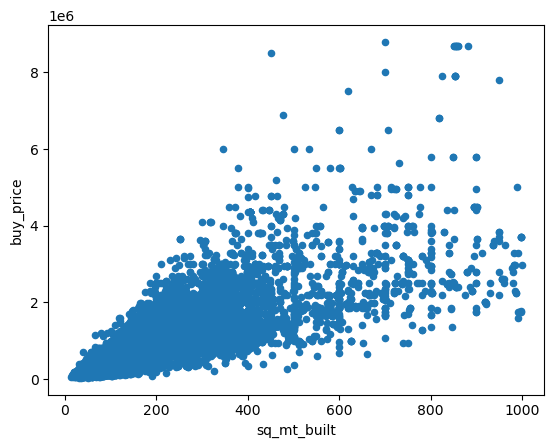

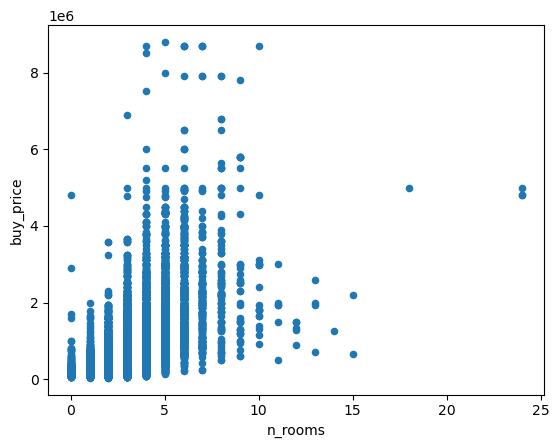

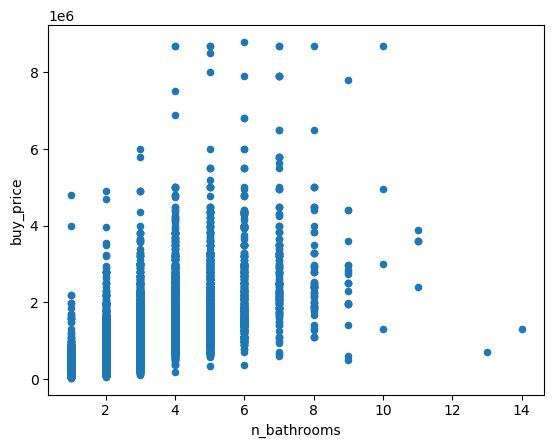

In [236]:
# replacing the NA values with some sensible defaults
# the way I was investigating these is by printing 
#    df["has_individual_heating"].value_counts(dropna=False) etc

df_shuffled = df.sample(frac = 1)

df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["n_bathrooms"] = df_shuffled["n_bathrooms"].fillna(1)
df_shuffled["n_rooms"] = df_shuffled["n_rooms"].fillna(1)
df_shuffled["is_new_development"] = df_shuffled["is_new_development"].fillna(False)
df_shuffled["is_renewal_needed"] = df_shuffled["is_renewal_needed"].fillna(False)
df_shuffled["has_fitted_wardrobes"] = df_shuffled["has_fitted_wardrobes"].fillna(False)

xfields = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes"]

xfields2 = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes", 'buy_price']


df_shuffled = df_shuffled[xfields2].dropna()



x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

df_shuffled[['sq_mt_built', "buy_price"]].plot.scatter(x='sq_mt_built', y="buy_price")
df_shuffled[["n_rooms", "buy_price"]].plot.scatter(x="n_rooms", y="buy_price")
df_shuffled[["n_bathrooms", "buy_price"]].plot.scatter(x="n_bathrooms", y="buy_price")



print(np.shape(training_data_x[0]), np.shape(training_data_y))

## P7: Implement grid search for multiple variables (3 pts)
Implement the linear predictor model for multiple variables. Note that this time ``x`` will be an array of 7 values, and ``theta`` will be an array of 8 values. 

Then, implement a grid search function (similar to P3) but this time for the 7 explanatory variables. Pass the grids as an array into the grid variable. 

In [240]:
# TODO: implement the predictor function here
def predict(x, theta):
    y_hat = theta[0] + theta[1]* x[0] + theta[2] * x[1]**2 + theta[3]*x[2]**3 + theta[4] * x[3]**4 + theta[5]*x[4]**5 + theta[6] * x[5]**6 + theta[7] * x[6]**7
    return y_hat

# TODO: implement the grid search function here 
def grid_search(data_x, data_y, grid):

    theta = grid
    alpha = 1
    m = len(data_y)

    data_y_pred = [0] * 16000
    
    loss = 99999999999999998
    prev_loss = 99999999999999999

    while loss <= prev_loss:
        for i in range(m):
            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])
            temp0 = theta[0] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,0])
            temp1 = theta[1] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,1])
            temp2 = theta[2] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,2])
            temp3 = theta[3] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,3])
            temp4 = theta[4] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,4])
            temp5 = theta[5] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,5])
            temp6 = theta[6] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,6])
            temp7 = theta[7] - alpha * gradient

        prev_loss = loss
        
        loss = 0

        for z in range(m):
            data_y_pred[z] = predict(data_x[z], theta)
        loss = loss_RMSE_sk(data_y, data_y_pred)
            
        theta[0] = temp0
        theta[1] = temp1
        theta[2] = temp2
        theta[3] = temp3
        theta[4] = temp4
        theta[5] = temp5
        theta[6] = temp6
        theta[7] = temp7
        
    print("loss of",loss)

    return theta
    

In [241]:
# TODO: run experiments with your implementation for the grid search 

grids = [-42500, 3800, -36000, 121500, -81000, 23000, -37500, 22000]

theta = grid_search(training_data_x, training_data_y, grids)

print(theta)


loss of 7998185.432904103
[-42482.516668749995, 5408.466475, -35947.55000625, 121517.48333125, -81000.0, 23000.0, -37500.0, 22000.0]


TODO: describe here your experiences with implementing this problem, conclusions you draw. 

## P8: Random search for multiple variables (3 pts)
Implement the random search technique for the multiple variables. 

In [242]:
# TODO: implement the random seeach function here 
def random_search(data_x, data_y):

    alpha = 1
    m = len(data_y)
    test_m = len(test_data_x)
    data_y_pred = [0] * m

    theta = [-40877.82028570352, 3851.24139656, -37039.08883477, 118106.6361039, -81269.44952463, 25821.33432403, -39906.24462166, 21676.70795698]
    
    loss = 99999999999999998
    prev_loss = 99999999999999999

    while loss <= prev_loss:
        for i in range(m):
            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])
            temp0 = theta[0] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,0])
            temp1 = theta[1] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,1])
            temp2 = theta[2] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,2])
            temp3 = theta[3] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,3])
            temp4 = theta[4] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,4])
            temp5 = theta[5] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,5])
            temp6 = theta[6] - alpha * gradient

            gradient = 1/m * (predict(data_x[i], theta) - data_y[i])*(data_x[i,6])
            temp7 = theta[7] - alpha * gradient

        prev_loss = loss
        
        loss = 0

        for z in range(m):
            data_y_pred[z] = predict(data_x[z], theta)
        loss = loss_RMSE_sk(data_y, data_y_pred)

        if(loss >= prev_loss):
            print(loss)
            return theta
            
        theta[0] = temp0
        theta[1] = temp1
        theta[2] = temp2
        theta[3] = temp3
        theta[4] = temp4
        theta[5] = temp5
        theta[6] = temp6
        theta[7] = temp7
        
    print(loss)

    return theta
    

In [243]:
# TODO: run experiments with your implementation for the

theta = random_search(training_data_x, training_data_y)

m = len(test_data_x)
data_y_pred = [0] * m

for z in range(m):
    data_y_pred[z] = predict(test_data_x[z], theta)

print("loss of", loss_RMSE_sk(test_data_y, data_y_pred))

print(theta)

7769297.854122786
loss of 8983517.467693318
[-40865.51973725282, 4982.891854024478, -37002.1871894179, 118118.9366523507, -81269.44952463, 25821.33432403, -39906.24462166, 21676.70795698]


TODO: describe here your experiments with the implementation for the random search

## P9: Use sklearn for linear regression in multiple variables (3 pts)
Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed.

In [244]:
# TODO: implement here

from sklearn.linear_model import LinearRegression


lr = LinearRegression()


lr.fit(training_data_x, training_data_y)

y_pred = lr.predict(test_data_x)

print("loss of",loss_RMSE_sk(test_data_y, lr.predict(test_data_x)))
print(lr.coef_, lr.intercept_)

418044.1341461777
[  3782.67850455 -35820.64425282 123146.16283343 -80571.43712591
  28815.97488878 -30990.09812953  24714.3360435 ] -50292.29074030428


In [ ]:
# TODO: run experiments here. 
#I didn't have enough time to find good parameters for the multivariate grid search function as a result the difference in the losses between mine and the sk model
#is atrocious

TODO: describe in one paragraph your experiences with implementing the multiple variable linear regression. 

## P10: Bonus: Data wrangling (3 pt)

Perform data preprocessing / cleaning / wrangling on the multiple variable dataset. This might include changing the range, removing outliers, etc. The objective is to obtain a better performance by a regressor as measured on the test data. Document your experiments with plots etc.

<AxesSubplot:xlabel='n_bathrooms', ylabel='buy_price'>

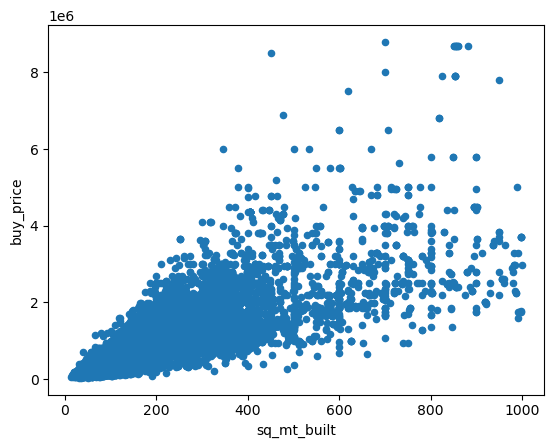

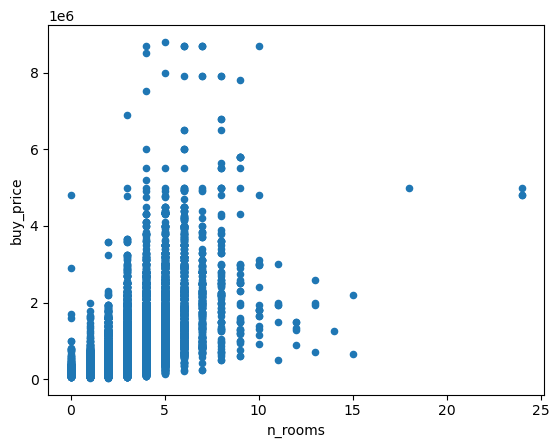

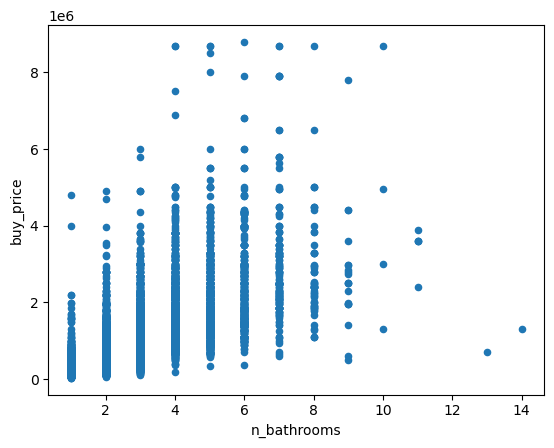

In [204]:
# TODO: insert the code you use to investigate the properties of the data here
df_shuffled[['sq_mt_built', "buy_price"]].plot.scatter(x='sq_mt_built', y="buy_price")
df_shuffled[["n_rooms", "buy_price"]].plot.scatter(x="n_rooms", y="buy_price")
df_shuffled[["n_bathrooms", "buy_price"]].plot.scatter(x="n_bathrooms", y="buy_price")

(7,) (16000,)


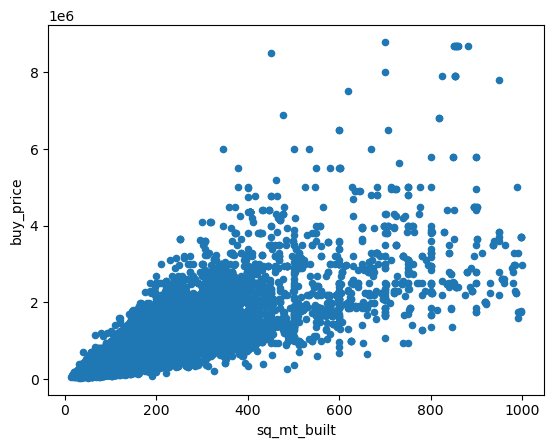

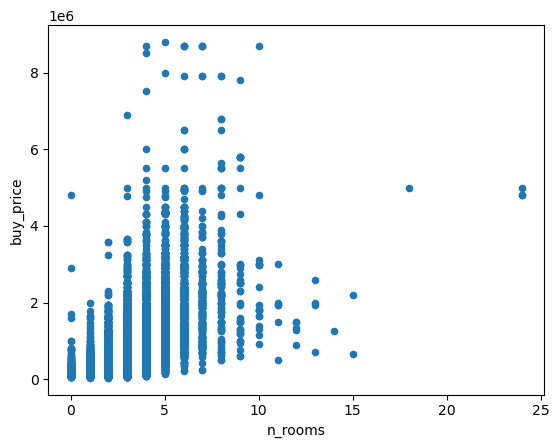

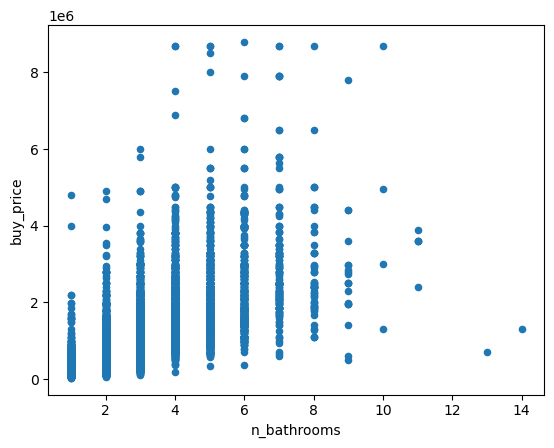

In [205]:
# TODO: implement the data transformations here
df_shuffled = df.sample(frac = 1)

df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["n_bathrooms"] = df_shuffled["n_bathrooms"].fillna(1)
df_shuffled["n_rooms"] = df_shuffled["n_rooms"].fillna(1)
df_shuffled["is_new_development"] = df_shuffled["is_new_development"].fillna(False)
df_shuffled["is_renewal_needed"] = df_shuffled["is_renewal_needed"].fillna(False)
df_shuffled["has_fitted_wardrobes"] = df_shuffled["has_fitted_wardrobes"].fillna(False)

xfields = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes"]

xfields2 = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes", 'buy_price']


df_shuffled = df_shuffled[xfields2].dropna()    #dropped colums with missing values



x = df_shuffled[xfields].to_numpy(dtype=np.float32)     #changed to float32
y = df_shuffled["buy_price"].to_numpy(dtype=np.float32)

for i in range(7):
    x[i] = (x[i]-np.mean(x[i]))/(max(x[i]) - min(x[i])) #normalized

y = (y-np.mean(y))/(max(y) - min(y))

training_data_x = x[:16000]
training_data_y = y[:16000]

test_data_x = x[16000:]
test_data_y = y[16000:]





print(np.shape(training_data_x[0]), np.shape(training_data_y))


In [245]:
# TODO: run experiments with the transformed data here. Measure the performance

lr.fit(training_data_x,training_data_y)
y_pred = lr.predict(test_data_x)
print("loss of",loss_RMSE_sk(test_data_y,y_pred))   #runs sqrt(n) time compared to previous data

loss of 418044.1341461777


TODO: describe in one paragraph your experiences with the data wrangling process.

## P11: Bonus: explore other linear regression techniques (3 pts)

Explore the use of other models provided from the sklearn library for linear regression. 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Try out two of them of your choice. Explain the results you obtained and compare them with other approaches. 

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

log = LogisticRegression()                  #logistic regression takes an extremely long time to run with multiple variables, it actually just stops running because it takes so long
log.fit(training_data_x, training_data_y)
y_pred = log.predict(test_data_x)

print(loss_RMSE_sk(test_data_y, y_pred))

rid = Ridge()                  #Ridge has a lower loss than linear regression in this multivariate instance
rid.fit(training_data_x, training_data_y)
y_pred = rid.predict(test_data_x)

print("loss of",loss_RMSE_sk(test_data_y, y_pred))

c:\Users\Seana\anaconda3\envs\IrisProject\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


595640.6067252759
418043.52491535735


# K-nearest neighbors

(16000,) (16000,)
(5616,) (5616,)


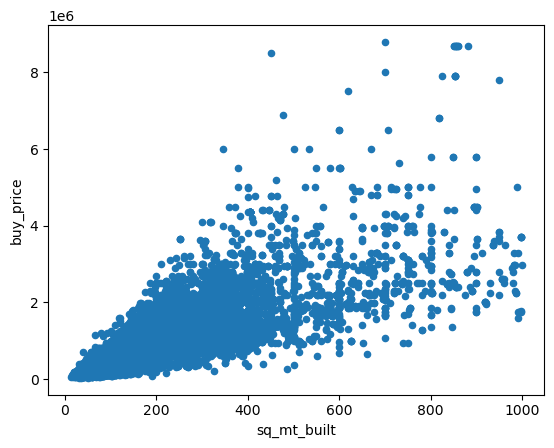

In [183]:
#data for k-nearest neighbors

df_shuffled = df.sample(frac = 1)

df_shuffled = df_shuffled[['sq_mt_built', 'buy_price']].dropna()

x = df_shuffled['sq_mt_built'].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)

training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

df_shuffled[['sq_mt_built', "buy_price"]].plot.scatter(x='sq_mt_built', y="buy_price")



print(np.shape(training_data_x), np.shape(training_data_y))
print(np.shape(test_data_x), np.shape(test_data_y))

## P12: K-nearest neighbors for the single variable case (3 pts)
Implement the k-nearest neighbor algorithm for the single variable case. Given an x value, find the k closest values from the training data, and return their average. 

In [186]:
# TODO: implement here 
def predict_k_nearest(x, k):

    r = len(x)
    sorted_x = np.array([0] * k)
    unsorted_x = [0]
    y_hat = [0] * r

    for i in range(r):
        unsorted_x = (abs(training_data_x - x[i]))
        sorted_x = np.argpartition(unsorted_x, k)
        sorted_x = sorted_x[:k]
        counter = 0

        for m in range (k):
            y_hat[i] += (training_data_y[sorted_x[m]])/k

    return y_hat

In [187]:
# TODO: experiment here in terms of accuracy and speed. Experiment with multiple values of k
k = 40

y_pred = predict_k_nearest(test_data_x, k)

loss_RMSE_sk("loss of",test_data_y, y_pred)

409555.9808198734

TODO: Write a paragraph about the results of the experiments. How does it compare 
to the other techniques you implemented above?

## P13: K-nearest neighbors for the multiple variable case (3 pts)
Implement the k-nearest neighbor algorithm for the multiple variable case. 

(7,) (16000,)


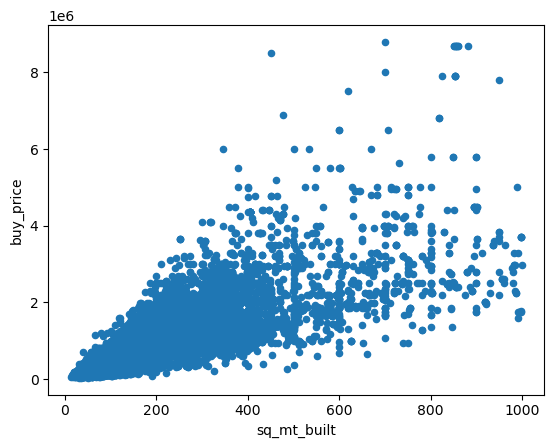

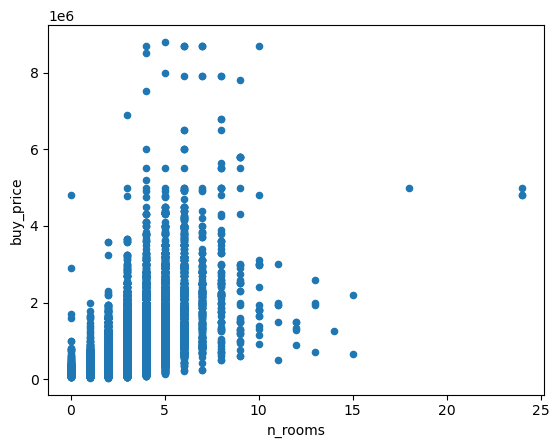

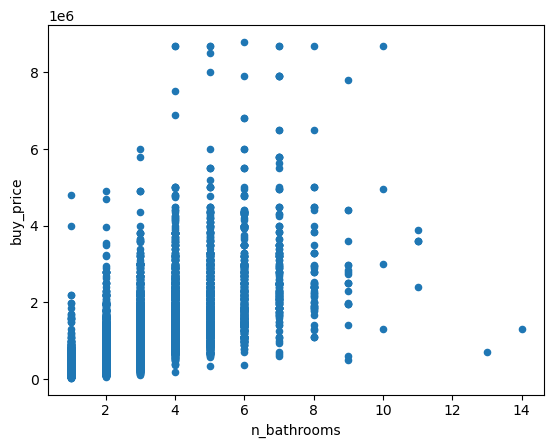

In [188]:
df_shuffled = df.sample(frac = 1)

df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["n_bathrooms"] = df_shuffled["n_bathrooms"].fillna(1)
df_shuffled["n_rooms"] = df_shuffled["n_rooms"].fillna(1)
df_shuffled["is_new_development"] = df_shuffled["is_new_development"].fillna(False)
df_shuffled["is_renewal_needed"] = df_shuffled["is_renewal_needed"].fillna(False)
df_shuffled["has_fitted_wardrobes"] = df_shuffled["has_fitted_wardrobes"].fillna(False)

xfields = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes"]

xfields2 = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes", 'buy_price']


df_shuffled = df_shuffled[xfields2].dropna()



x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

df_shuffled[['sq_mt_built', "buy_price"]].plot.scatter(x='sq_mt_built', y="buy_price")
df_shuffled[["n_rooms", "buy_price"]].plot.scatter(x="n_rooms", y="buy_price")
df_shuffled[["n_bathrooms", "buy_price"]].plot.scatter(x="n_bathrooms", y="buy_price")



print(np.shape(training_data_x[0]), np.shape(training_data_y))

In [194]:
# TODO: implement here 
def predict_k_nearest_multiple(x, k):
    
    for y in range (len(x[0])):

        xi = x[:,y]
        r = len(xi)
        y_hat = [[0] * 7 for i in range (r)]
        #print(np.shape(y_hat))

        for i in range(r):
            

            unsorted_x = (abs(training_data_x[:,y] - xi[i]))
            #print(np.shape(unsorted_x))
            sorted_x = np.argpartition(unsorted_x, k)
            sorted_x = sorted_x[:k]
            counter = 0

            for m in range (k):
                y_hat[i][y] += (training_data_y[sorted_x[m]])/k

    for i in range (r):
        y_hat[i] = np.mean(y_hat[i])
    


    return y_hat
    
    

In [195]:
# TODO: experiment here in terms of accuracy and speed. Experiment with multiple values of k. 

k = 10 #couldnt figure out how to adjust the variables in terms of Y especially the ones that are boolean

y_pred = predict_k_nearest_multiple(test_data_x, k)

print("loss of",loss_RMSE_sk(test_data_y, y_pred))

(5616,)


909620.1508134037

TODO: Write a paragraph about the results of the experiments. How does it compare 
to the other techniques you implemented above?

## P14: Bonus: Experiment with the sklearn implementation of K-nearest neighbors (3 pts)
Using the ``sklearn sklearn.neighbors.KNeighborsRegressor`` model, implement the multi-variable regression model. Run experiments with different values of the $k$ hyper-parameter. 

In [197]:
# TODO: run experiments here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

#training_data_x= np.reshape(training_data_x,(-1, 1))
#test_data_x = np.reshape(test_data_x,(-1, 1))

knn.fit(training_data_x, training_data_y)

y_pred = knn.predict(test_data_x)

print("loss of",loss_RMSE_sk(test_data_y,y_pred))


489325.0576428421


TODO: Write a paragraph about the results of the experiments. How does it compare to the techniques you implemented for k-nearest neighbor in terms of accuracy and speed. Provide an explanation for the results. 